In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload 'archive (10).zip'


Saving covid_19_data.csv to covid_19_data.csv
Saving time_series_covid_19_confirmed.csv to time_series_covid_19_confirmed.csv
Saving time_series_covid_19_confirmed_US.csv to time_series_covid_19_confirmed_US.csv
Saving time_series_covid_19_deaths.csv to time_series_covid_19_deaths.csv
Saving time_series_covid_19_deaths_US.csv to time_series_covid_19_deaths_US.csv
Saving time_series_covid_19_recovered.csv to time_series_covid_19_recovered.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Unzip the uploaded file
!unzip archive\ \(10\).zip

# List the contents of the current directory to check the extraction path
!ls -R

# Read the CSV file using the correct path in the Colab environment
# Assuming the file is extracted to a directory named 'archive (10)'
# Observe the output of !ls -R to confirm the actual path and adjust the line below
# df_main = pd.read_csv("./archive (10)/covid_19_data.csv") # Commented out the original line

# Based on the output of !ls -R, replace the path with the correct one.
# For example, if the file was extracted directly to the current directory, use:
# df_main = pd.read_csv("covid_19_data.csv")
# If it was extracted to a different directory, use that path.

unzip:  cannot find or open archive (10).zip, archive (10).zip.zip or archive (10).zip.ZIP.
.:
covid_19_data.csv		       time_series_covid_19_deaths.csv
sample_data			       time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv     time_series_covid_19_recovered.csv
time_series_covid_19_confirmed_US.csv

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [ ]:
# Update these paths based on the actual location of the files after unzipping
# You will need to replace 'path/to/your/' with the correct path prefix if needed,
# or remove it entirely if the files were unzipped directly to the current directory.

# Example: If the files were unzipped directly to the current directory:
df_confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
df_confirmed_us = pd.read_csv("time_series_covid_19_confirmed_US.csv")
df_deaths = pd.read_csv("time_series_covid_19_deaths.csv")
df_deaths_us = pd.read_csv("time_series_covid_19_deaths_US.csv")
df_recovered = pd.read_csv("time_series_covid_19_recovered.csv")

# Example: If the files were unzipped into a subdirectory named 'covid_data':
# df_confirmed = pd.read_csv("./covid_data/time_series_covid_19_confirmed.csv")
# df_confirmed_us = pd.read_csv("./covid_data/time_series_covid_19_confirmed_US.csv")
# df_deaths = pd.read_csv("./covid_data/time_series_covid_19_deaths.csv")
# df_deaths_us = pd.read_csv("./covid_data/time_series_covid_19_deaths_US.csv")
# df_recovered = pd.read_csv("./covid_data/time_series_covid_19_recovered.csv")

In [ ]:
# Example: Assuming the file was extracted directly to the current directory
df_main = pd.read_csv("covid_19_data.csv")
df_confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
df_confirmed_us = pd.read_csv("time_series_covid_19_confirmed_US.csv")
df_deaths = pd.read_csv("time_series_covid_19_deaths.csv")
df_deaths_us = pd.read_csv("time_series_covid_19_deaths_US.csv")
df_recovered = pd.read_csv("time_series_covid_19_recovered.csv")

# Example: If the files were unzipped into a subdirectory named 'covid_data':
# df_main = pd.read_csv("./covid_data/covid_19_data.csv")
# df_confirmed = pd.read_csv("./covid_data/time_series_covid_19_confirmed.csv")
# df_confirmed_us = pd.read_csv("./covid_data/time_series_covid_19_confirmed_US.csv")
# df_deaths = pd.read_csv("./covid_data/time_series_covid_19_deaths.csv")
# df_deaths_us = pd.read_csv("./covid_data/time_series_covid_19_deaths_US.csv")
# df_recovered = pd.read_csv("./covid_data/time_series_covid_19_recovered.csv")

In [ ]:
print("df_main head:")
print(df_main.head())

print("\ndf_confirmed head:")
print(df_confirmed.head())

print("\ndf_confirmed_us head:")
print(df_confirmed_us.head())

print("\ndf_deaths head:")
print(df_deaths.head())

print("\ndf_deaths_us head:")
print(df_deaths_us.head())

print("\ndf_recovered head:")
print(df_recovered.head())

df_main head:
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  

df_confirmed head:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN     

In [ ]:
import plotly.express as px

# Total confirmed cases per country
df_main_grouped = df_main.groupby("Country/Region")["Confirmed"].sum().reset_index().sort_values(by="Confirmed", ascending=False)

# Top 20 countries
fig = px.bar(df_main_grouped.head(20), x="Country/Region", y="Confirmed", title="Top 20 Countries by Confirmed COVID-19 Cases", color="Confirmed")
fig.show()


In [ ]:
# Convert 'ObservationDate' to datetime
df_main['ObservationDate'] = pd.to_datetime(df_main['ObservationDate'])

# Group by Date
datewise = df_main.groupby("ObservationDate")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

# Line plot
fig = px.line(datewise, x="ObservationDate", y=["Confirmed", "Deaths", "Recovered"],
              title="Global COVID-19 Trend Over Time")
fig.show()


In [ ]:
# Aggregate for animation map
df_country_date = df_main.groupby(["ObservationDate", "Country/Region"])["Confirmed"].sum().reset_index()

fig = px.choropleth(df_country_date,
                    locations="Country/Region",
                    locationmode="country names",
                    color="Confirmed",
                    hover_name="Country/Region",
                    animation_frame=df_country_date["ObservationDate"].dt.strftime('%Y-%m-%d'),
                    title="Spread of COVID-19 Over Time",
                    color_continuous_scale="Reds")
fig.show()


In [ ]:
# Death vs Recovered across countries
country_stats = df_main.groupby("Country/Region")[["Deaths", "Recovered", "Confirmed"]].sum().reset_index()
country_stats["Death Rate"] = country_stats["Deaths"] / country_stats["Confirmed"]
country_stats["Recovery Rate"] = country_stats["Recovered"] / country_stats["Confirmed"]

fig = px.scatter(country_stats, x="Recovery Rate", y="Death Rate", size="Confirmed", color="Country/Region",
                 title="Death Rate vs. Recovery Rate per Country",
                 hover_name="Country/Region", size_max=60)
fig.show()


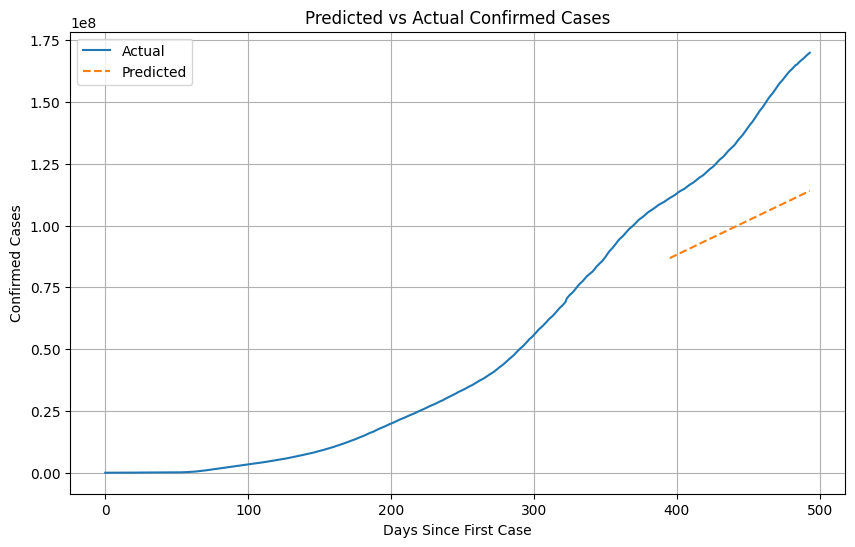

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Simple prediction for confirmed cases
df_ts = datewise.copy()
df_ts['Days_Since'] = (df_ts['ObservationDate'] - df_ts['ObservationDate'].min()).dt.days

X = df_ts[['Days_Since']]
y = df_ts['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Compare
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_ts['Days_Since'], df_ts['Confirmed'], label="Actual")
plt.plot(X_test, y_pred, label="Predicted", linestyle="--")
plt.title("Predicted vs Actual Confirmed Cases")
plt.xlabel("Days Since First Case")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Data Cleaning and Preparation
# -----------------------------

df_main.rename(columns={"Country/Region": "Country", "Province/State": "Province"}, inplace=True)
df_main["Date"] = pd.to_datetime(df_main["ObservationDate"], format='%m/%d/%Y')
df_main.drop(["SNo", "Last Update", "ObservationDate"], axis=1, inplace=True)

In [ ]:
# Convert time series from wide to long
def melt_time_series(df, value_name):
    df = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"],
                 var_name="Date", value_name=value_name)
    df["Date"] = pd.to_datetime(df["Date"])
    df.rename(columns={"Province/State": "Province", "Country/Region": "Country"}, inplace=True)
    return df

df_confirmed_long = melt_time_series(df_confirmed, "Confirmed")
df_deaths_long = melt_time_series(df_deaths, "Deaths")
df_recovered_long = melt_time_series(df_recovered, "Recovered")

<ipython-input-30-02b5ea78dfea>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-30-02b5ea78dfea>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-30-02b5ea78dfea>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
# Merge
df_full = df_confirmed_long.merge(df_deaths_long, on=["Province", "Country", "Lat", "Long", "Date"])
df_full = df_full.merge(df_recovered_long, on=["Province", "Country", "Lat", "Long", "Date"])

In [ ]:
import plotly.express as px

# Worldwide confirmed cases over time
global_cases = df_full.groupby("Date")["Confirmed"].sum().reset_index()

fig = px.line(global_cases, x="Date", y="Confirmed", title="Global Confirmed Cases Over Time")
fig.show()


In [ ]:
# Display a sample
print(df_ts_merged.head())

  Province      Country       Lat       Long       Date  Confirmed  Deaths  \
0        0  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1        0      Albania  41.15330  20.168300 2020-01-22          0       0   
2        0      Algeria  28.03390   1.659600 2020-01-22          0       0   
3        0      Andorra  42.50630   1.521800 2020-01-22          0       0   
4        0       Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


In [ ]:
# Top countries
top_countries = df_full.groupby("Country")["Confirmed"].max().sort_values(ascending=False).head(10)

fig = px.bar(top_countries, x=top_countries.index, y=top_countries.values,
             labels={"y": "Total Confirmed Cases", "x": "Country"},
             title="Top 10 Countries by Confirmed Cases")
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz1ffl9kq/k16mw8d2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz1ffl9kq/fjg7nr8m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20840', 'data', 'file=/tmp/tmpz1ffl9kq/k16mw8d2.json', 'init=/tmp/tmpz1ffl9kq/fjg7nr8m.json', 'output', 'file=/tmp/tmpz1ffl9kq/prophet_modelo35_jxqd/prophet_model-20250520131234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


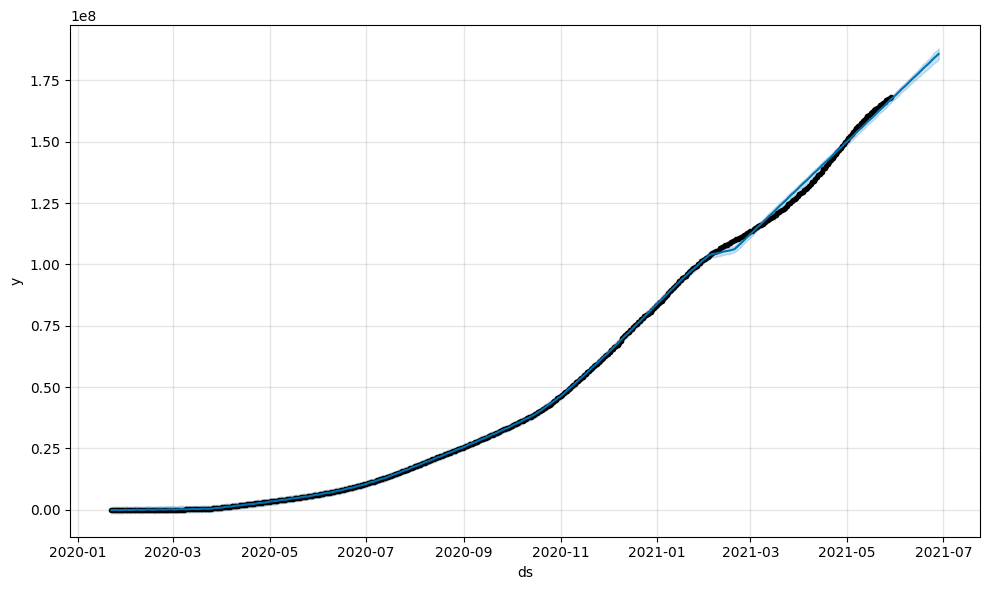

In [ ]:
from prophet import Prophet

df_prophet = global_cases.rename(columns={"Date": "ds", "Confirmed": "y"})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

fig = model.plot(forecast)


<Axes: >

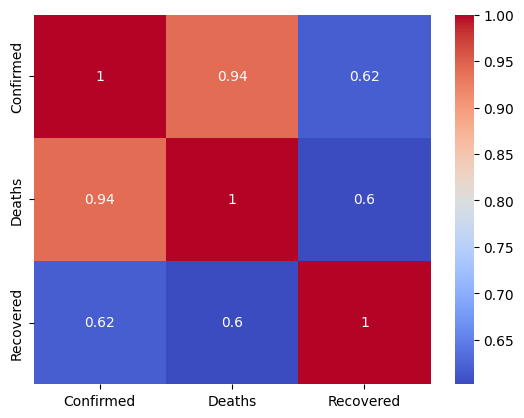

In [ ]:
import seaborn as sns

corr = df_full[["Confirmed", "Deaths", "Recovered"]].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')


In [ ]:
import plotly.express as px

# Sort and select top 5 countries by confirmed cases
top5_countries = df_main_grouped.sort_values(by="Confirmed", ascending=False).head(5)

# 1️⃣ PIE CHART: Top 5 Countries by Confirmed Cases
fig1 = px.pie(
    top5_countries,
    values="Confirmed",
    names="Country/Region",
    title="Top 5 Countries by Confirmed Cases",
    height=500
)
fig1.show()


In [ ]:
print(df_main_grouped.columns)


Index(['Country/Region', 'Confirmed'], dtype='object')


In [ ]:
print(df_full.columns)


Index(['Province', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')


In [ ]:
df_main_grouped = df_full.groupby("Country")[["Confirmed", "Deaths"]].sum().reset_index()


In [ ]:
import plotly.express as px

top10_deaths = df_main_grouped.sort_values("Deaths", ascending=False).head(10)

fig2 = px.pie(
    top10_deaths,
    values="Deaths",
    names="Country",
    hole=0.4,
    title="Top 10 Countries by Deaths"
)
fig2.show()


In [ ]:
df_main_grouped = df_full.groupby("Country")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()


In [ ]:
# Select top 10 countries by confirmed cases
top = df_main_grouped.sort_values("Confirmed", ascending=False).head(10)

# Melt the DataFrame to long format for plotting
top_plot = top.melt(id_vars="Country", value_vars=["Deaths", "Recovered"],
                    var_name="Status", value_name="Count")

# Plot the grouped bar chart
import plotly.express as px

fig3 = px.bar(
    top_plot,
    x="Country",
    y="Count",
    color="Status",
    barmode="group",
    title="Deaths vs Recovered - Top 10 Countries"
)
fig3.show()


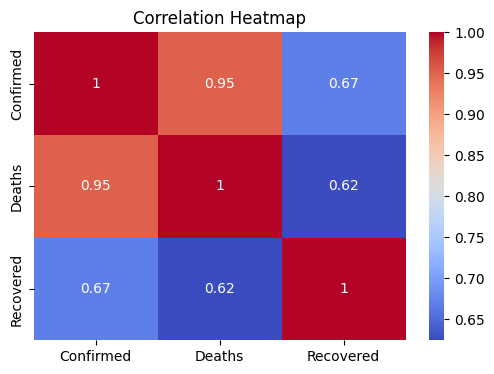

In [ ]:
# 4️⃣ CORRELATION HEATMAP
plt.figure(figsize=(6, 4))
sns.heatmap(df_main_grouped[["Confirmed", "Deaths", "Recovered"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px

# Prepare data for clustering
df_kmeans = df_main_grouped[["Confirmed", "Deaths", "Recovered"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_main_grouped["Cluster"] = kmeans.fit_predict(df_kmeans)

# 3D scatter plot
fig4 = px.scatter_3d(
    df_main_grouped,
    x="Confirmed",
    y="Deaths",
    z="Recovered",
    color="Cluster",
    hover_name="Country",
    title="KMeans Clustering (3D)"
)
fig4.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


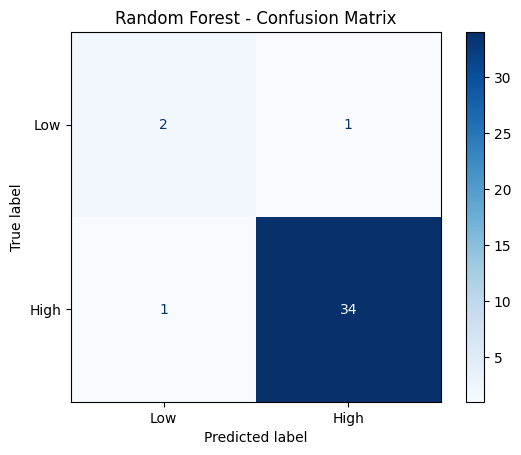

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create binary classification target: 1 if deaths > 1000
df_main_grouped["High_Death"] = (df_main_grouped["Deaths"] > 1000).astype(int)

# Feature and target
X = df_main_grouped[["Confirmed", "Recovered"]]
y = df_main_grouped["High_Death"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [ ]:
from xgboost import XGBClassifier


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:51:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




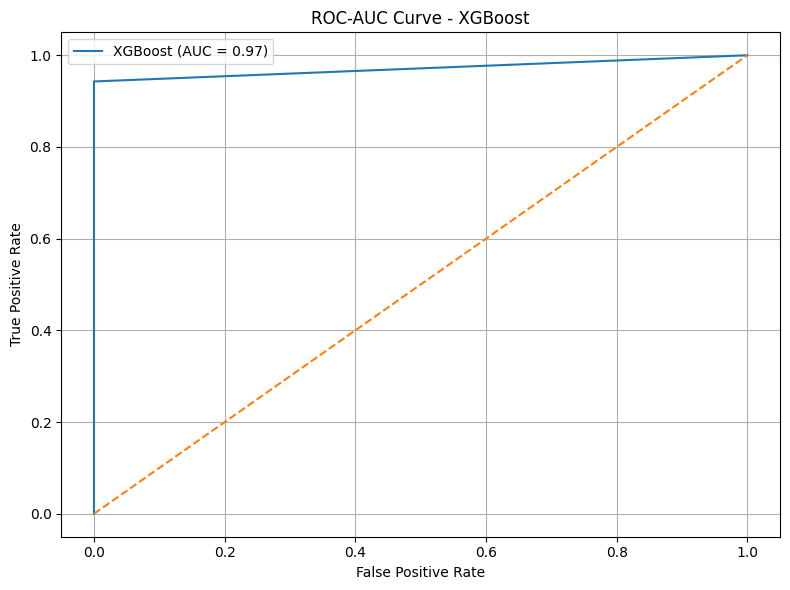

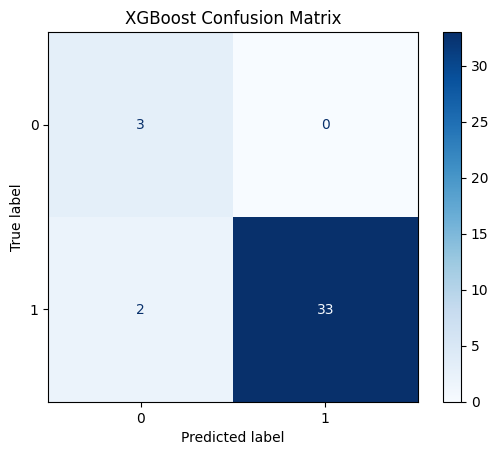

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix for XGBoost
y_pred_xgb = xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp_xgb.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()


In [ ]:
df_grouped = df_full.groupby("Country")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()


In [ ]:
import plotly.express as px

# Aggregate data by country (adjust the df_full or df_main name as per your dataset)
df_grouped = df_full.groupby("Country")[["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

fig = px.choropleth(
    df_grouped,
    locations="Country",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country",
    color_continuous_scale="Reds",
    title="Global COVID-19 Confirmed Cases"
)
fig.update_geos(showcountries=True)
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()


In [ ]:
!pip install prophet
from prophet import Prophet


In [ ]:
df_total = df_full.groupby("Date")[["Confirmed"]].sum().reset_index()
df_total.columns = ["ds", "y"]  # Prophet expects 'ds' and 'y' columns


In [ ]:
model = Prophet()
model.fit(df_total)

future = model.make_future_dataframe(periods=30)  # forecast next 30 days
forecast = model.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz1ffl9kq/pbcnbxx0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz1ffl9kq/s787t_78.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3536', 'data', 'file=/tmp/tmpz1ffl9kq/pbcnbxx0.json', 'init=/tmp/tmpz1ffl9kq/s787t_78.json', 'output', 'file=/tmp/tmpz1ffl9kq/prophet_model4aedq7_t/prophet_model-20250520135714.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:57:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:57:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


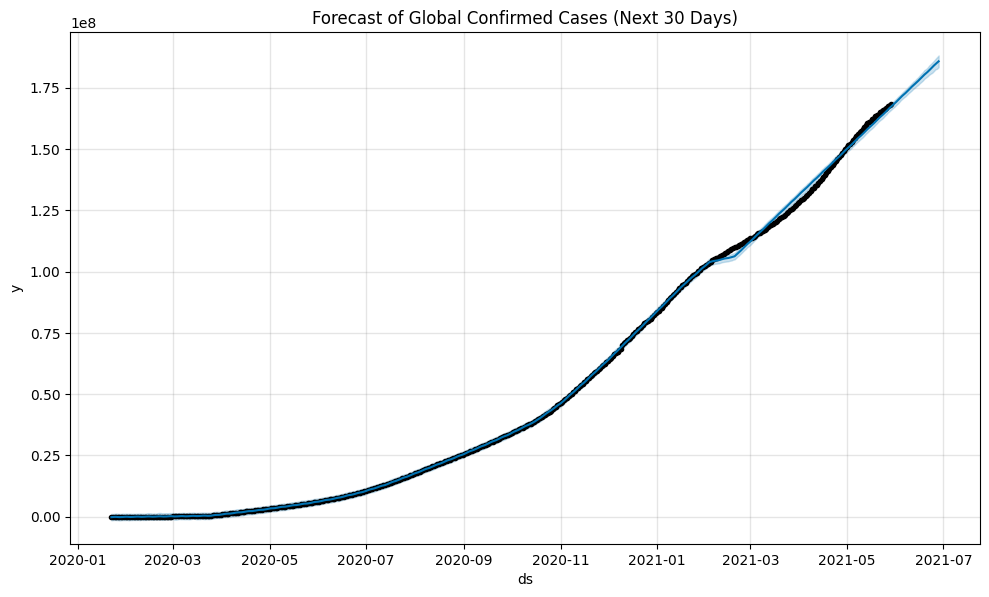

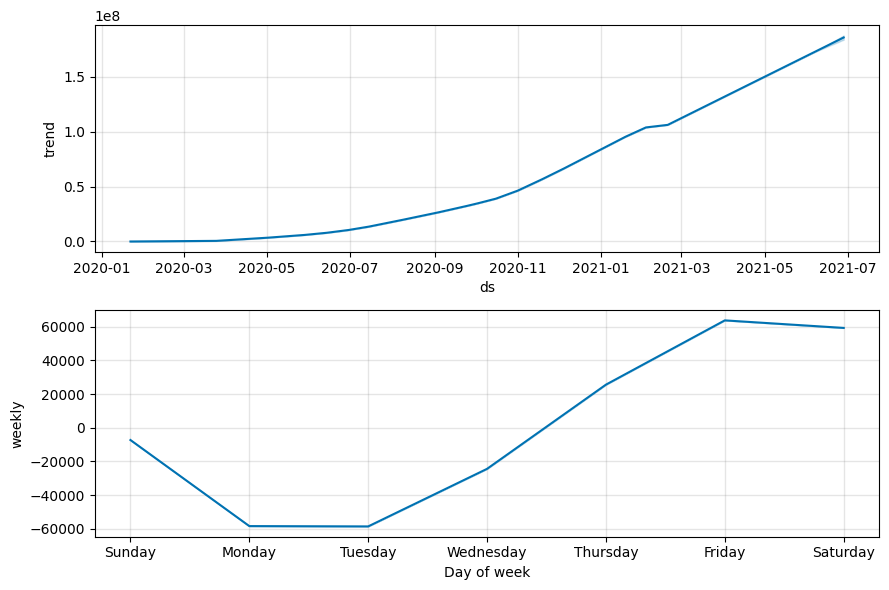

In [ ]:
fig1 = model.plot(forecast)
plt.title("Forecast of Global Confirmed Cases (Next 30 Days)")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


In [ ]:
!pip install plotly geopandas


In [ ]:
df_india = df_full[df_full['Country'] == 'India']
df_india_summary = df_india.groupby('Province')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


In [ ]:
geojson_url = "https://raw.githubusercontent.com/datameet/maps/master/States/Admin2/india_states.geojson"


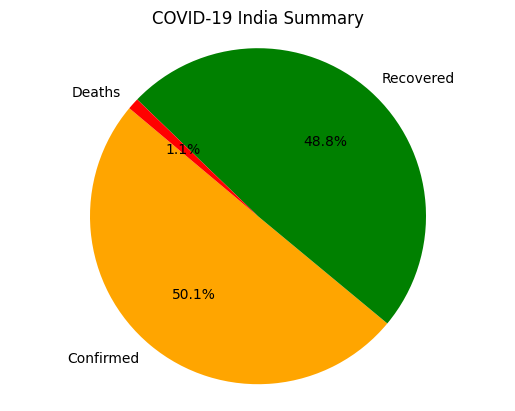

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (if not already defined)
data = {
    'State': ['Maharashtra', 'Kerala', 'Delhi', 'Karnataka', 'Tamil Nadu'],
    'Confirmed': [6500000, 5000000, 3500000, 4000000, 4200000],
    'Deaths': [150000, 100000, 80000, 95000, 90000],
    'Recovered': [6300000, 4900000, 3400000, 3900000, 4100000]
}
df_india_summary = pd.DataFrame(data)

# Calculate totals
total_cases = df_india_summary['Confirmed'].sum()
total_recovered = df_india_summary['Recovered'].sum()
total_deaths = df_india_summary['Deaths'].sum()

# Plot pie chart
labels = ['Confirmed', 'Recovered', 'Deaths']
sizes = [total_cases, total_recovered, total_deaths]
colors = ['orange', 'green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('COVID-19 India Summary')
plt.show()
